In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [2]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [3]:
labels = ['Abnormal(Ulcer)','Normal(Healthy skin)']

In [4]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DFU_dataset','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        try:
            img = cv2.resize(img,(image_size, image_size))
        except:
            break
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DFU_dataset','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 115/115 [00:03<00:00, 34.58it/s]


In [5]:
X_train.shape

(3200, 224, 224, 3)

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=1010)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=1010)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
import keras
import keras.utils
from keras import utils as np_utils
import numpy as np
from keras import layers
from keras.models import Model, load_model
import pydot
from keras.utils.vis_utils import plot_model
from matplotlib.pyplot import imshow

In [10]:
IMAGE_SIZE = [224, 224]

In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

In [12]:
def modified_layers(x):
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024,activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(1024,activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    x = Dense(512,activation='relu')(x)
    return x

In [13]:
mobileNetV2 = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in mobileNetV2.layers:
    layer.trainable = False
x = modified_layers(mobileNetV2.output)
prediction1 = Dense(2, activation='softmax')(x)
model_mobileNetV2 = Model(inputs=mobileNetV2.inputs, outputs=prediction1)
model_mobileNetV2.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                               

In [14]:
resNet50 = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in resNet50.layers:
    layer.trainable = False
x = modified_layers(resNet50.output)
prediction1 = Dense(2, activation='softmax')(x)
model_resNet50 = Model(inputs=resNet50.inputs, outputs=prediction1)
model_resNet50.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [15]:
xception = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in xception.layers:
    layer.trainable = False
x = modified_layers(xception.output)
prediction1 = Dense(2, activation='softmax')(x)
model_xception = Model(inputs=xception.inputs, outputs=prediction1)
model_xception.summary()

83683744/83683744 [==============================] - 5s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                    

In [16]:
inceptionV3 = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in inceptionV3.layers:
    layer.trainable = False
x = modified_layers(inceptionV3.output)
prediction1 = Dense(2, activation='softmax')(x)
model_inceptionV3 = Model(inputs=inceptionV3.inputs, outputs=prediction1)
model_inceptionV3.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 rmalization)              

In [17]:
denseNet121 = DenseNet121(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in denseNet121.layers:
    layer.trainable = False
x = modified_layers(denseNet121.output)
prediction1 = Dense(2, activation='softmax')(x)
model_denseNet121 = Model(inputs=denseNet121.inputs, outputs=prediction1)
model_denseNet121.summary()

29084464/29084464 [==============================] - 2s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_5[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

In [18]:
model_mobileNetV2.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("mobileNetV2.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
model_mobileNetV2.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 0.5127 - accuracy: 0.7882
Epoch 1: val_accuracy improved from -inf to 0.82639, saving model to mobileNetV2.h5
81/81 [==============================] - 17s 64ms/step - loss: 0.5127 - accuracy: 0.7882 - val_loss: 0.3793 - val_accuracy: 0.8264 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.3567 - accuracy: 0.8515
Epoch 2: val_accuracy improved from 0.82639 to 0.84028, saving model to mobileNetV2.h5
81/81 [==============================] - 4s 49ms/step - loss: 0.3567 - accuracy: 0.8515 - val_loss: 0.4062 - val_accuracy: 0.8403 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.8603
Epoch 3: val_accuracy did not improve from 0.84028
81/81 [==============================] - 4s 45ms/step - loss: 0.3409 - accuracy: 0.8603 - val_loss: 0.4201 - val_accuracy: 0.8229 - lr: 0.0010
Epoch 4/50
81/81 [==============================] - ETA: 0s - loss

In [19]:
model_resNet50.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("resNet50.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
model_resNet50.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 0.3040 - accuracy: 0.9035
Epoch 1: val_accuracy improved from -inf to 0.96181, saving model to resNet50.h5
81/81 [==============================] - 15s 128ms/step - loss: 0.3040 - accuracy: 0.9035 - val_loss: 0.1039 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.1037 - accuracy: 0.9645
Epoch 2: val_accuracy improved from 0.96181 to 0.97222, saving model to resNet50.h5
81/81 [==============================] - 9s 112ms/step - loss: 0.1037 - accuracy: 0.9645 - val_loss: 0.0836 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 0.9691
Epoch 3: val_accuracy did not improve from 0.97222
81/81 [==============================] - 8s 104ms/step - loss: 0.0890 - accuracy: 0.9691 - val_loss: 0.0788 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 4/50
81/81 [==============================] - ETA: 0s - loss: 0

In [20]:
model_xception.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("xception.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
model_xception.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 6.7336 - accuracy: 0.6663
Epoch 1: val_accuracy improved from -inf to 0.68750, saving model to xception.h5
81/81 [==============================] - 19s 165ms/step - loss: 6.7336 - accuracy: 0.6663 - val_loss: 0.6774 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.6226 - accuracy: 0.7434
Epoch 2: val_accuracy improved from 0.68750 to 0.81250, saving model to xception.h5
81/81 [==============================] - 12s 149ms/step - loss: 0.6226 - accuracy: 0.7434 - val_loss: 0.4877 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.5041 - accuracy: 0.7758
Epoch 3: val_accuracy did not improve from 0.81250
81/81 [==============================] - 12s 146ms/step - loss: 0.5041 - accuracy: 0.7758 - val_loss: 0.4522 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 4/50
81/81 [==============================] - ETA: 0s - loss:

In [21]:
model_inceptionV3.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("inceptionV3.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
model_inceptionV3.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 4.9800 - accuracy: 0.7041
Epoch 1: val_accuracy improved from -inf to 0.81250, saving model to inceptionV3.h5
81/81 [==============================] - 15s 103ms/step - loss: 4.9800 - accuracy: 0.7041 - val_loss: 0.4106 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.5332 - accuracy: 0.7735
Epoch 2: val_accuracy improved from 0.81250 to 0.82986, saving model to inceptionV3.h5
81/81 [==============================] - 7s 87ms/step - loss: 0.5332 - accuracy: 0.7735 - val_loss: 0.4577 - val_accuracy: 0.8299 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.5009 - accuracy: 0.7820
Epoch 3: val_accuracy improved from 0.82986 to 0.83333, saving model to inceptionV3.h5
81/81 [==============================] - 7s 87ms/step - loss: 0.5009 - accuracy: 0.7820 - val_loss: 0.4557 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 4/50
81/81 [===========

In [22]:
model_denseNet121.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("denseNet121.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
model_denseNet121.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 1.0204 - accuracy: 0.7377
Epoch 1: val_accuracy improved from -inf to 0.85069, saving model to denseNet121.h5
81/81 [==============================] - 20s 141ms/step - loss: 1.0204 - accuracy: 0.7377 - val_loss: 0.3794 - val_accuracy: 0.8507 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.4100 - accuracy: 0.8299
Epoch 2: val_accuracy did not improve from 0.85069
81/81 [==============================] - 9s 109ms/step - loss: 0.4100 - accuracy: 0.8299 - val_loss: 0.4099 - val_accuracy: 0.8299 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.3459 - accuracy: 0.8611
Epoch 3: val_accuracy improved from 0.85069 to 0.88194, saving model to denseNet121.h5
81/81 [==============================] - 10s 121ms/step - loss: 0.3459 - accuracy: 0.8611 - val_loss: 0.3349 - val_accuracy: 0.8819 - lr: 0.0010
Epoch 4/50
81/81 [==============================] - ETA: 0s - 

In [23]:
pred_prob1 = model_mobileNetV2.predict(X_test)
pred_prob2 = model_xception.predict(X_test)
pred_prob3 = model_resNet50.predict(X_test)
pred_prob4 = model_inceptionV3.predict(X_test)
pred_prob5 = model_denseNet121.predict(X_test)

10/10 [==============================] - 3s 92ms/step


In [24]:
y_test=np.argmax(y_test,axis=1)

In [25]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [26]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_mobileNetV2 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score_xception = roc_auc_score(y_test, pred_prob2[:,1])
auc_score_resNet50 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score_inceptionV3 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score_denseNet121 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score_mobileNetV2, auc_score_xception, auc_score_resNet50, auc_score_inceptionV3,auc_score_denseNet121)

0.9543696510862409 0.9179970375246873 0.9965026333113891 0.9304229756418697 0.9723913759052009


<ipython-input-27-8ce026c4030d>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


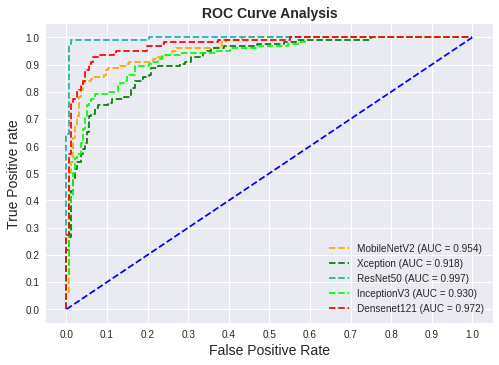

In [27]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='MobileNetV2 (AUC = 0.954)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Xception (AUC = 0.918)')
plt.plot(fpr3, tpr3, linestyle='--',color='LightSeaGreen', label='ResNet50 (AUC = 0.997)')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='InceptionV3 (AUC = 0.930)')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Densenet121 (AUC = 0.972)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':14}, loc='lower right')
# x label
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)
# y label
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive rate', fontsize=14)

plt.legend(loc='best')
plt.savefig('ROC curve',dpi=400)
plt.show();

<ipython-input-30-d6fea29abb75>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


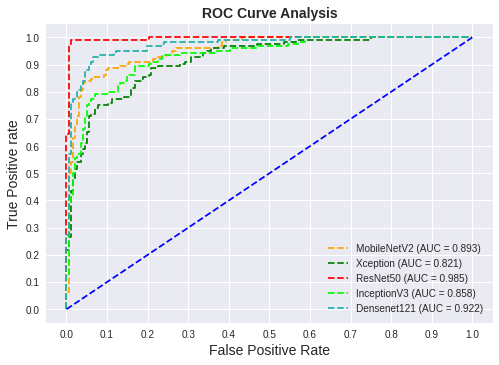

In [30]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='MobileNetV2 (AUC = 0.893)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Xception (AUC = 0.821)')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='ResNet50 (AUC = 0.985)')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='InceptionV3 (AUC = 0.858)')
plt.plot(fpr5, tpr5, linestyle='--',color='LightSeaGreen', label='Densenet121 (AUC = 0.922)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':14}, loc='lower right')
# x label
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)
# y label
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive rate', fontsize=14)

plt.legend(loc='best')
plt.savefig('ROC curve12',dpi=400)
plt.show();

<ipython-input-31-e85adbe0718c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


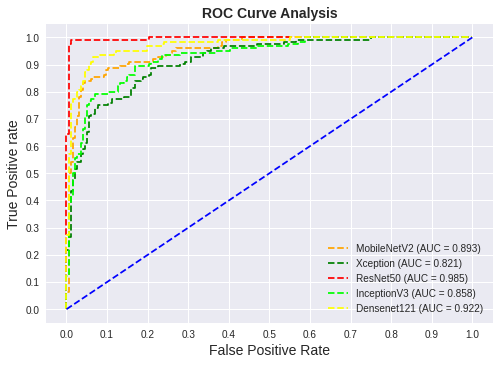

In [31]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='MobileNetV2 (AUC = 0.893)')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Xception (AUC = 0.821)')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='ResNet50 (AUC = 0.985)')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='InceptionV3 (AUC = 0.858)')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Densenet121 (AUC = 0.922)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':14}, loc='lower right')
# x label
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)
# y label
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive rate', fontsize=14)

plt.legend(loc='best')
plt.savefig('ROC curve13',dpi=400)
plt.show();